min alpha: 8.0
max alpha: 11.0
[1686.81918576 1689.09204804 1691.36873975 1693.64926864 1695.93364246
 1698.221869   1700.51395606 1702.80991145 1705.10974302 1707.41345862
 1709.72106613 1712.03257343 1714.34798844 1716.66731909 1718.99057332
 1721.31775911 1723.64888444 1725.98395731 1728.32298576 1730.66597782
 1733.01294156 1735.36388506 1737.71881641 1740.07774375 1742.44067521
 1744.80761894 1747.17858314 1749.55357598 1751.9326057  1754.31568053
 1756.70280872 1759.09399855 1761.48925832 1763.88859634 1766.29202094
 1768.69954049 1771.11116336 1773.52689794 1775.94675265 1778.37073592
 1780.79885621 1783.231122   1785.66754178 1788.10812406 1790.55287739
 1793.00181032 1795.45493142 1797.9122493  1800.37377258 1802.83950989
 1805.3094699  1807.78366128 1810.26209274 1812.744773   1815.2317108
 1817.72291491 1820.21839411 1822.71815721 1825.22221304 1827.73057045
 1830.2432383  1832.76022549 1835.28154094 1837.80719357 1840.33719234
 1842.87154623 1845.41026425 1847.9533554  1850

<Figure size 1000x600 with 0 Axes>

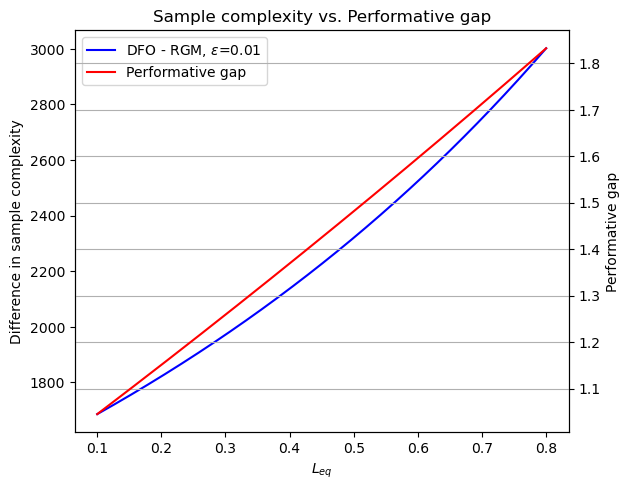

In [9]:
import numpy as np
import matplotlib.pyplot as plt

L_l = 0.8      
alpha = 8.5   
R = 1.0       
epsilon = 0.01
sigma_m = 1.0
dimension = 2
B = 1.0
L_z = 10
L_u = 10
gamma = 2

LipEq_values = np.linspace(0.1, 0.8, 400)


def sample_complexity_rgm(LipEq, L_l, alpha, R, epsilon, sigma_m):
    term1 = (L_l**2 * (1 + LipEq**2)) / alpha**2 * np.log(2 * R**2 / epsilon)
    term2 = (sigma_m**2) / (alpha**2 * epsilon)
    return term1 + term2


def sample_complexity_dfo(LipEq, L_l, alpha, c, epsilon):
    L = L_l * (1 + LipEq)
    alpha_bar = (alpha - 2 * LipEq * L_l)
    
    assert (alpha_bar > 0).all(), f"alpha_bar should be greater than 0, {alpha_bar}"
    
    term1 = 16 * np.power(alpha_bar, 4) * epsilon * np.power(B, 2)
    term2 = 8 * c * np.power((alpha_bar + L) * B + L, 2)
    # term1 is a scalar, term2 is a vector.
    # make an array of term1 to match the shape of term2
    term1_arr = np.full(term2.shape, term1)
    # take the element-wise maximum of term1_arr and term2
    max_term = np.maximum(term1_arr, term2)
    
    return max_term / (np.power(alpha_bar, 4) * np.power(epsilon, 2))


def performative_gap(LipEq, L_l, L_z, alpha):
    return (1+LipEq) * L_l * L_z / (alpha - LipEq * L_l)

print("min alpha:", max(LipEq_values * L_z))
print("max alpha:",min(L_u + L_z * LipEq_values))

assert (alpha > LipEq_values * L_z).all(), f"alpha / (L_eq * L_l) should be greater than 1, {LipEq_values * L_z}"
assert (alpha < L_u + L_z * LipEq_values).all(), f"alpha should be less than L_l * (1 + L_eq), {L_u + L_z * LipEq_values}"


rgm_values = sample_complexity_rgm(LipEq_values, L_l, alpha, R, epsilon, sigma_m)
performative_gap_values = performative_gap(LipEq_values, L_l, L_z, alpha)

dfo_values = sample_complexity_dfo(LipEq_values, L_l, alpha, c=1, epsilon=epsilon)
print(dfo_values)
print(rgm_values)

# Plotting
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots()
ax1.set_xlabel('$L_{eq}$')
ax1.set_ylabel('Difference in sample complexity')
# ax1.set_yscale('log')
lns1 = ax1.plot(LipEq_values, dfo_values - rgm_values, label=f'DFO - RGM, $\epsilon$={epsilon}', color='blue')
# lns2 = ax1.plot(LipEq_values, dfo_values, label=f'DFO, $\epsilon$={epsilon}', color = 'blue', linestyle='dashed')

ax2 = ax1.twinx()

ax2.set_ylabel('Performative gap')
lns3 = ax2.plot(LipEq_values, performative_gap_values, label='Performative gap', color='red')

lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()
plt.grid(True)
plt.title('Sample complexity vs. Performative gap')
plt.show()